In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict as dd
import csv

In [3]:
def get_data(game):
    vanilla_data = [np.genfromtxt('data/'+ game + '/vanilla/sample-efficiency/'+str(i), delimiter=',', names=True, usecols=(2, 5)) for i in range(1, 11)]
    ride_data = [np.genfromtxt('data/'+ game + '/ride/sample-efficiency/'+str(i), delimiter=',', names=True, usecols=(6, 12)) for i in range(1, 31)]
    iride_data = [np.genfromtxt('data/'+ game + '/iride/sample-efficiency/'+str(i), delimiter=',', names=True, usecols=(7, 13)) for i in range(1, 11)]
    
    return dict(vanilla=vanilla_data,
               ride=ride_data,
               iride=iride_data)

In [35]:
def generate_mean_and_std(data_list):
    d = dd(list)
    for data in data_list:
#         rewards, frames = zip(*(data))
        for (reward, frame) in data:
            d[frame].append(reward)
    
    frames = []
    mean_return = []
    std = []
    for key, val_lst in sorted(d.items()):
        frames.append(key)
        val_lst = [0 if np.isnan(x) else x for x in val_lst]
        mean_return.append(np.mean(val_lst))
        std.append(np.std(val_lst))
        
    return dict(frames=frames,
                mean_return=mean_return,
                std=std
                )

In [5]:
def generate_culm_mean_and_std(data_list):
    d = dd(list)
    for data in data_list:
        rewards, frames = zip(*(data))
        
        culm_reward = []
        reward_so_far = 0
        for reward in rewards:
            reward_so_far += reward
            culm_reward.append(reward_so_far)
        
        for (reward, frame) in zip(culm_reward, frames):
            d[frame].append(reward)
        
    frames = []
    mean_return = []
    std = []
    for key, val_lst in sorted(d.items()):
        frames.append(key)
        mean_return.append(np.mean(val_lst))
        std.append(np.std(val_lst))
        
    return dict(frames=frames,
                mean_return=mean_return,
                std=std
                )

In [75]:
def save_mean_episode_return_to_csv(game):
    data_dict = get_data(game)
    ride_data_list = data_dict['ride']
    iride_data_list = data_dict['iride']
    
    ride_dict = generate_mean_and_std(ride_data_list)
    iride_dict = generate_mean_and_std(iride_data_list)
    
    print(np.mean(ride_dict['mean_return']))
    print(np.mean(iride_dict['mean_return']))
    
#     rows = zip(ride_dict['mean_return'], iride_dict['mean_return'])
#     with open('./'+game+'.csv', 'w', newline='') as myfile:
#         wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#         wr.writerow(['ride','iride'])
#         wr.writerows(rows)

In [76]:
save_mean_episode_return_to_csv('caveflyer')
save_mean_episode_return_to_csv('climber')
save_mean_episode_return_to_csv('coinrun')
save_mean_episode_return_to_csv('jumper')
save_mean_episode_return_to_csv('leaper')
save_mean_episode_return_to_csv('ninja')

2.121315681090255
2.12068288921275
1.1771897654149266
1.1844167407057733
6.36225213797659
6.314268923656555
0.9190548936655666
0.9155635545427384
1.987386393911017
1.9886941192803478
3.509583673132171
3.5089530848225516


In [6]:
def plot_rewards(game, mode='culm'):
    data_dict = get_data(game)
    vanilla_data_list = data_dict['vanilla']
    ride_data_list = data_dict['ride']
    iride_data_list = data_dict['iride']
    
    if mode=='culm':
        vanilla_dict = generate_culm_mean_and_std(vanilla_data_list)
        ride_dict = generate_culm_mean_and_std(ride_data_list)
        iride_dict = generate_culm_mean_and_std(iride_data_list)
    else:
        vanilla_dict = generate_mean_and_std(vanilla_data_list)
        ride_dict = generate_mean_and_std(ride_data_list)
        iride_dict = generate_mean_and_std(iride_data_list)
    
    x_vanilla = vanilla_dict['frames']
    y_vanilla = vanilla_dict['mean_return']
    y_vanilla_error = vanilla_dict['std']
    
    x_ride = ride_dict['frames']
    y_ride = ride_dict['mean_return']
    y_ride_error = ride_dict['std']
    
    x_iride = iride_dict['frames']
    y_iride = iride_dict['mean_return']
    y_iride_error = iride_dict['std']
    
    plt.errorbar(x_vanilla, y_vanilla, yerr=y_vanilla_error, label='vanilla', color='b')
    plt.errorbar(x_ride, y_ride, yerr=y_ride_error, label='ride', color='g')
    plt.errorbar(x_iride, y_iride, yerr=y_iride_error, label='iride', color='r')
    
    plt.xlabel('frames')
    if mode=='culm':
        plt.ylabel('culmulative mean score')
        plt.title(game)
    else:
        plt.ylabel('mean score')
        plt.title(game)
    plt.legend()
    plt.show()
# matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, 
#                            barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, 
#                            errorevery=1, capthick=None, *, data=None, **kwargs)

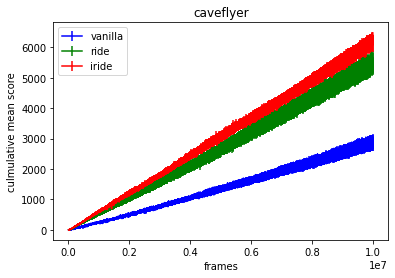

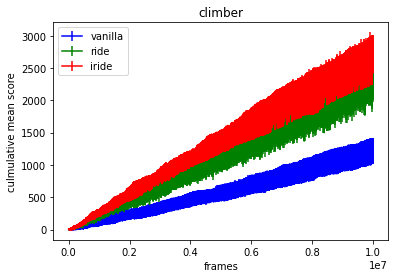

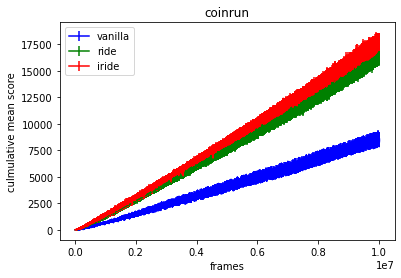

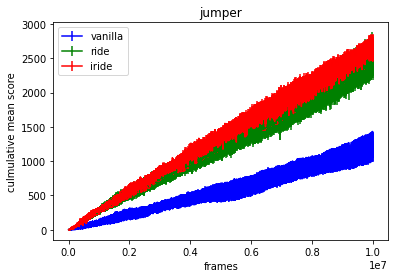

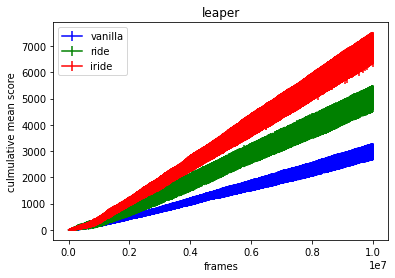

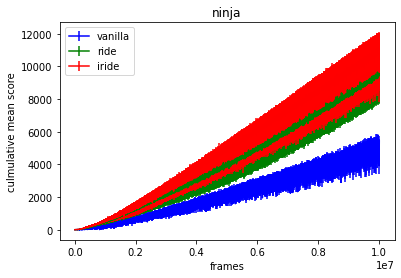

In [179]:
plot_rewards('caveflyer')
plot_rewards('climber')
plot_rewards('coinrun')
plot_rewards('jumper')
plot_rewards('leaper')
plot_rewards('ninja')

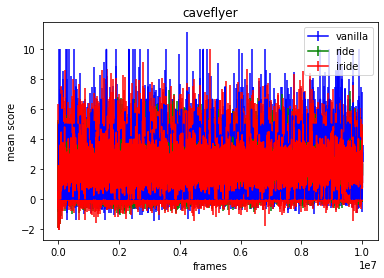

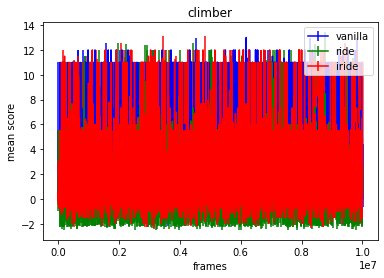

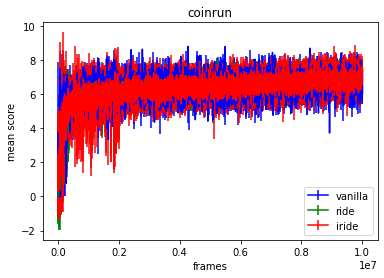

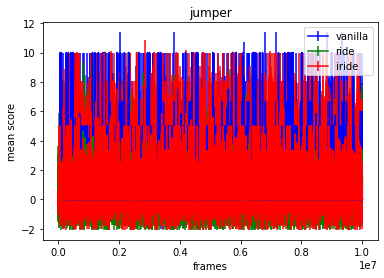

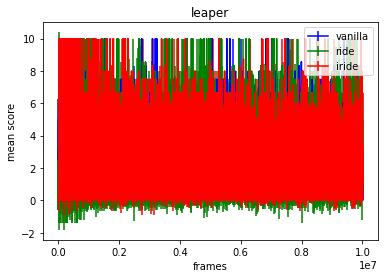

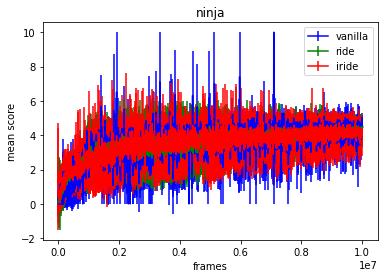

In [180]:
plot_rewards('caveflyer', mode='mean')
plot_rewards('climber', mode='mean')
plot_rewards('coinrun', mode='mean')
plot_rewards('jumper', mode='mean')
plot_rewards('leaper', mode='mean')
plot_rewards('ninja', mode='mean')

In [8]:
def get_generalization_data(game, algo):
    lvl100 = [np.genfromtxt('data/'+game+'/'+algo+'/generalization/'+algo+'-lvl100-st'+st+'/logs.csv', 
                            delimiter=',', skip_header=1, usecols=(4, 2), missing_values='nan', 
                            converters={4: lambda s: float(s or 0)}) for st in ['0', '100', '200']]
    lvl500 = [np.genfromtxt('data/'+game+'/'+algo+'/generalization/'+algo+'-lvl500-st'+st+'/logs.csv', 
                            delimiter=',', skip_header=1, usecols=(4, 2), missing_values='nan', 
                            converters={4: lambda s: float(s or 0)}) for st in ['0', '100', '200']]
    lvl1000 = [np.genfromtxt('data/'+game+'/'+algo+'/generalization/'+algo+'-lvl1000-st'+st+'/logs.csv', 
                            delimiter=',', skip_header=1, usecols=(4, 2), missing_values='nan', 
                            converters={4: lambda s: float(s or 0)}) for st in ['0', '100', '200']]
    lvl5000 = [np.genfromtxt('data/'+game+'/'+algo+'/generalization/'+algo+'-lvl5000-st'+st+'/logs.csv', 
                            delimiter=',', skip_header=1, usecols=(4, 2), missing_values='nan', 
                            converters={4: lambda s: float(s or 0)}) for st in ['0', '100', '200']]
    lvl10000 = [np.genfromtxt('data/'+game+'/'+algo+'/generalization/'+algo+'-lvl10000-st'+st+'/logs.csv', 
                            delimiter=',', skip_header=1, usecols=(4, 2), missing_values='nan', 
                            converters={4: lambda s: float(s or 0)}) for st in ['0', '100', '200']]

    return dict(lvl100=lvl100,
                lvl500=lvl500,
                lvl1000=lvl1000,
                lvl5000=lvl5000,
                lvl10000=lvl10000
                )

In [64]:
def plot_generalization(game):
    iride_data = get_generalization_data('caveflyer', 'iride')
    ride_data = get_generalization_data('caveflyer', 'ride')
    
    x = [100, 500, 1000, 5000, 10000]
    
    y_ride_train = []
    y_iride_train = []
    
    for lvl in ["100", "500", "1000", "5000", "10000"]:
        y_ride_train.append(np.mean(generate_mean_and_std(ride_data["lvl"+lvl])['mean_return']))
        y_iride_train.append(np.mean(generate_mean_and_std(iride_data["lvl"+lvl])['mean_return']))
    
    xi = list(range(len(x)))
    
    plt.plot(xi, y_ride_train, label='ride', color='g', marker='.')
    plt.plot(xi, y_iride_train, label='iride', color='r', marker='.')
    
    plt.ylabel('mean episode score')
    plt.xlabel('number of levels')
    plt.title(game)
    plt.xticks(xi, x)
    plt.legend()
    plt.show()

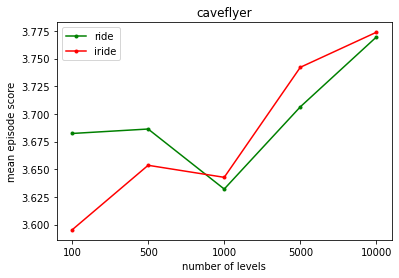

In [65]:
plot_generalization('caveflyer')

In [32]:
def get_200lvl_easy_data(game):
    vanilla = [np.genfromtxt('data/'+game+'/vanilla/sample-efficiency/torchbeast-lvl200-st'+st+'/logs.csv',
                             delimiter=',', skip_header=1, usecols=(3, 2), missing_values='nan', 
                             converters={4: lambda s: float(s or 0)}) for st in ['0', '1000', '5000']]
    ride = [np.genfromtxt('data/'+game+'/ride/sample-efficiency/ride-lvl200-st'+st+'/logs.csv',
                             delimiter=',', skip_header=1, usecols=(4, 2), missing_values='nan', 
                             converters={4: lambda s: float(s or 0)}) for st in ['0', '1000', '5000']]
    iride = [np.genfromtxt('data/'+game+'/iride/sample-efficiency/iride-lvl200-st'+st+'/logs.csv',
                             delimiter=',', skip_header=1, usecols=(4, 2), missing_values='nan', 
                             converters={4: lambda s: float(s or 0)}) for st in ['0', '1000', '5000']]
    
    return dict(vanilla=vanilla,
                ride=ride,
                iride=iride
    )

In [68]:
def plot_200lvl_easy(game):
    data_dict = get_200lvl_easy_data(game)
    
    vanilla_dict = generate_mean_and_std(data_dict['vanilla'])
    ride_dict = generate_mean_and_std(data_dict['ride'])
    iride_dict = generate_mean_and_std(data_dict['iride'])
    
    x_vanilla = vanilla_dict['frames']
    y_vanilla = vanilla_dict['mean_return']
    y_vanilla_error = vanilla_dict['std']
    
    x_ride = ride_dict['frames']
    y_ride = ride_dict['mean_return']
    y_ride_error = ride_dict['std']
    
    x_iride = iride_dict['frames']
    y_iride = iride_dict['mean_return']
    y_iride_error = iride_dict['std']
    
    plt.errorbar(x_vanilla, y_vanilla, yerr=y_vanilla_error, label='vanilla', color='b')
    plt.errorbar(x_ride, y_ride, yerr=y_ride_error, label='ride', color='g')
    plt.errorbar(x_iride, y_iride, yerr=y_iride_error, label='iride', color='r')
    
    plt.ylabel('mean score')
    plt.xlabel('frames')
    plt.title(game)
    
    plt.legend()
    plt.show()
    
    print("vanilla mean score: ", np.mean(y_vanilla))
    print("ride mean score: ", np.mean(y_ride))
    print("iride mean score: ", np.mean(y_iride))

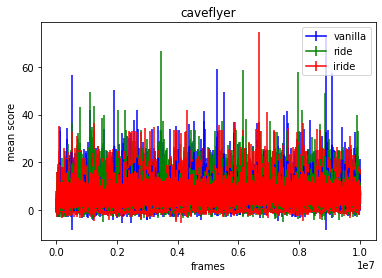

vanilla mean score:  6.410625286266999
ride mean score:  6.13379730355444
iride mean score:  6.0542943820715385


In [69]:
plot_200lvl_easy('caveflyer')